# Tesla Deaths Exploratory Data Analysis

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Contando a Introdução do Paper  
Baixei, primeiramente, a biblioteca que contabilizava o número de acidentes envolvendo óbitos com condutores da Tesla desde o ano de 2014.

In [3]:
df = pd.read_csv('tesla.csv')

In [4]:
sns.set_theme(style='whitegrid',palette='mako' )

# Métricas Selecionadas
Podemos observar, abaixo, o número de casos contabilizados no total, além do ano e data de ocorrência. Temos, na coluna de 'Country' o país no qual ocorreu o acidente, seguido pelo Estado do óbito. Nas colunas adiante, de 'Description', há um breve resumo sobre o ocorrido. Em 'Deaths', podemos observar o número de óbitos ocorridos. Posteriormente, em 'Tesla driver', há a especificação se havia condução autônoma do veículo ou se um passageiro guiava o condutor. Em colunas como 'Occupant', descrevemos o número de passageiros. Nas colunas seguintes, temos 'Model', especificando o veículo em si. Temos, posteriormente, 'Sources', que especifica a fonte que noticiou o acidente.

In [5]:
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,...,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla...,NaN,NaN,NaN,NaN,NaN
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,...,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-...,NaN,NaN,NaN,NaN,NaN
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,...,1,NaN,-,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,...,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-f...,NaN,NaN,NaN,NaN,NaN
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1,-,-,...,1,-,-,-,https://www.boothbayregister.com/article/sout...,NaN,James T. Penner,NaN,NaN,NaN


In [6]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df_date = df.groupby(by='Year').sum().reset_index()

<ipython-input-8-55cea291210b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_date = df.groupby(by='Year').sum().reset_index()


# Evolução de entregas e Mortes
A seguir, no gráfico o qual estipula, no Eixo X o ano de ocorrência de mortes, e no Eixo Y, o número de mortes em cada ano, podemos observar que há uma evolução crescente de casos nos últimos cinco anos, entre 2018 e 2022, diante de uma maior popularização da Tesla. Dados das Relações com Investidores da Tesla mostram que, em 2018, 245.491 veículos foram entregues, montante 138% acima do registrado no acumulado de 2017. Podemos correlacionar o número de acidentes por uma maior evolução e popularização da montadora elétrica, baseada em Palo Alto, no Estado da Califórnia. Eis, então, os números de entrega da Tesla desde 2014.

2014 - 31.655
2015 - 50.517
2016 - 76.243
2017 - 103.091
2018 - 245.491
2019 - 367.656
2020 - 499.535
2021 - 936.000
2022 - 1.369.611


## Years

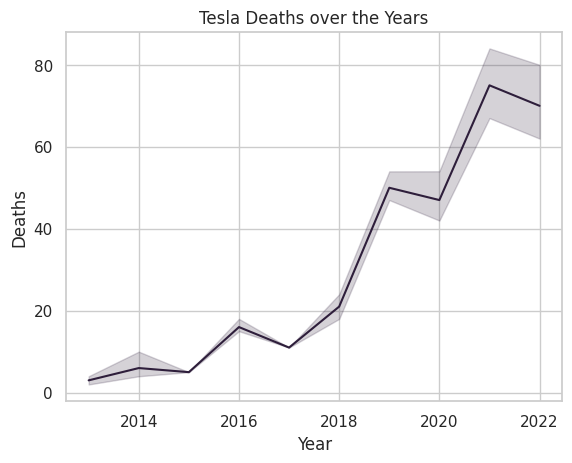

In [9]:
sns.lineplot(data=df, x='Year', y='Deaths', estimator='sum').set(title='Tesla Deaths over the Years', );


In [10]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [11]:
df['Day']=df['Date'].dt.strftime('%d')
df['Week']= df['Date'].dt.strftime('%A')
df['Month']=df['Date'].dt.strftime('%m')

In [12]:
df['Month'] = df['Date'].dt.strftime('%m')

In [13]:
df.head()


,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4,Day,Week,Month
0,254,2022,2022-08-16,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,...,-,https://www.tag24.de/nachrichten/unfall/tesla...,NaN,NaN,NaN,NaN,NaN,16,Tuesday,08
1,253,2022,2022-08-15,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,...,-,https://www.ksbw.com/article/hollister-crash-...,NaN,NaN,NaN,NaN,NaN,15,Monday,08
2,252,2022,2022-08-14,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,...,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN,14,Sunday,08
3,251,2022,2022-08-02,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,...,-,https://www.wfla.com/news/man-in-wheelchair-f...,NaN,NaN,NaN,NaN,NaN,02,Tuesday,08
4,250,2022,2022-07-27,USA,ME,Tesla crashes at high speed,1,1,-,-,...,-,https://www.boothbayregister.com/article/sout...,NaN,James T. Penner,NaN,NaN,NaN,27,Wednesday,07


# Número de mortes em dias da semana
Podemos observar, pelo levantamento, que sábado foi o dia da semana que mais contabilizou acidentes e óbitos envolvendo condutores do Tesla, seguidos pela Segunda-feira e, em sequência, Sexta-feira. Há também uma maior especificação sobre a data, no mês, em que ocorreram os acidentes. Posteriormente, na linha 21, podemos observar a contabilização dos meses que houve registro de mortes envolvendo condutores de Tesla. Pelo gráfico, é possível apontar que o mês de maio foi o que mais contabilizou acidentes e mortes envolvendo a montadora elétrica.





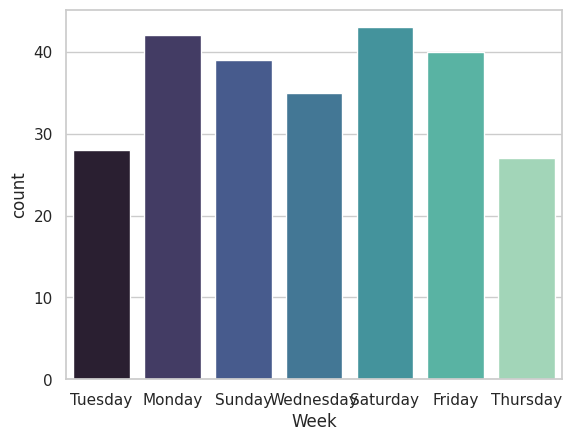

In [14]:
sns.countplot(data=df, x='Week', palette='mako');

In [15]:
df.sort_values('Day', inplace=True)

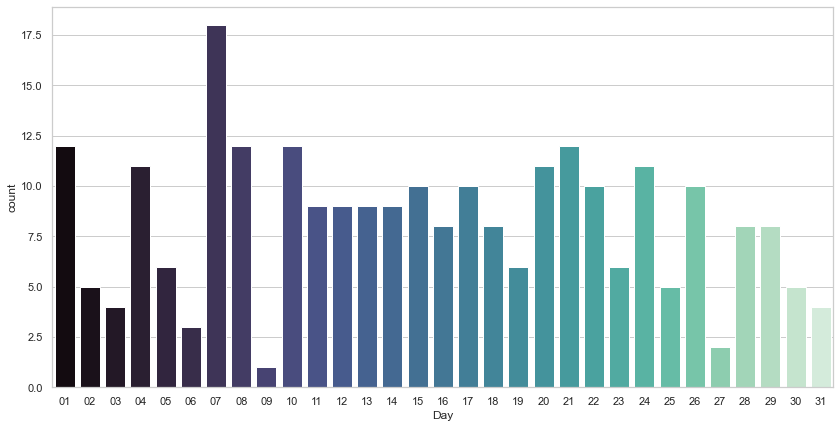

In [ ]:
#days
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='Day', palette='mako');

In [16]:
df.sort_values(by='Month', inplace=True)

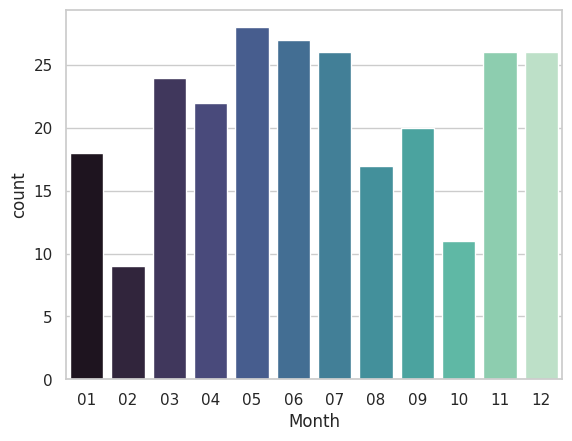

In [17]:
sns.countplot(data=df, x='Month', palette='mako');

## Country

# EUA assumem liderança
Em termos de mortes por país, os Estados Unidos são o país com o maior número de óbitos, naturalmente, pelo fato da montadora elétrica estar baseada no Estado da Califórnia. Naturalmente, por possuir plantas fabris na Alemanha e na China, a montadora elétrica de Musk também conta com razoável popularidade nos dois países, nos continente europeu e asiático, respectivamente, o que pode explicar as mortes.

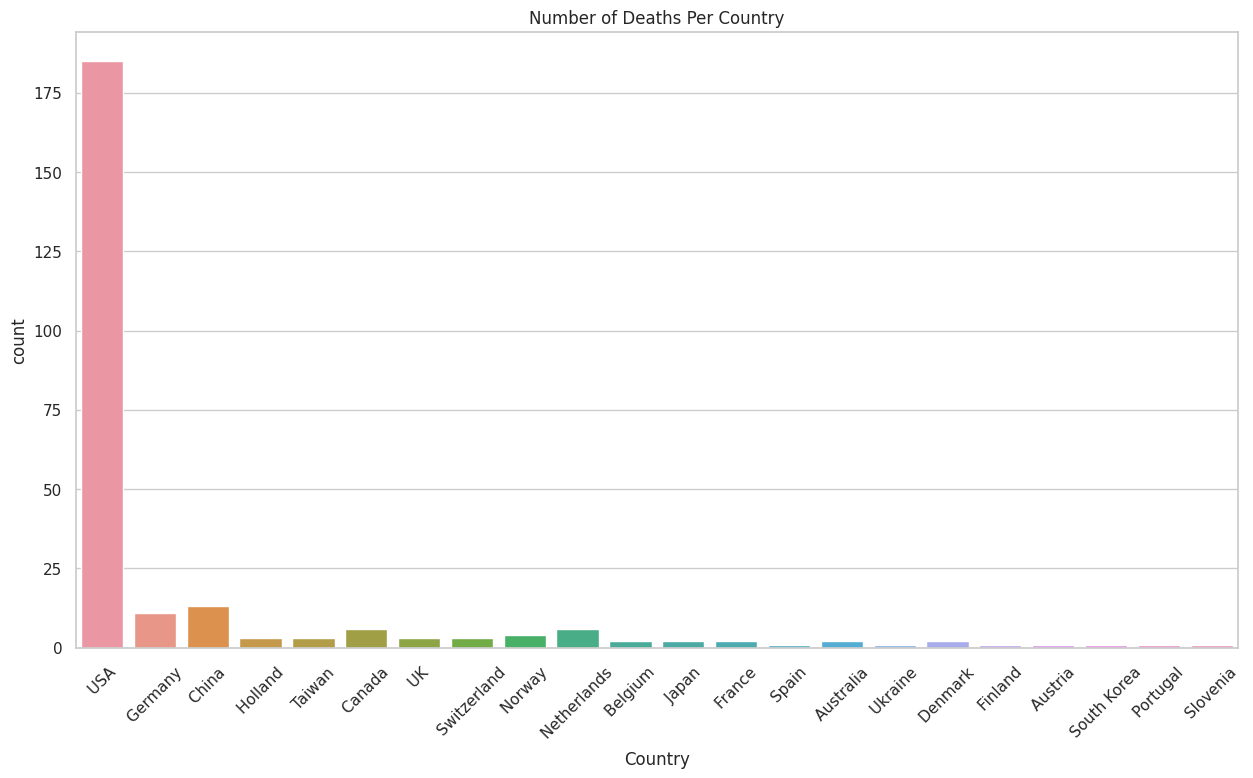

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Country').set(title='Number of Deaths Per Country');
plt.xticks(rotation=45)

plt.show()

In [19]:
df['Country'].value_counts()

 USA             185
 China            13
 Germany          11
 Canada            6
 Netherlands       6
 Norway            4
 Holland           3
 Taiwan            3
 UK                3
 Switzerland       3
 Australia         2
 Denmark           2
 Japan             2
 France            2
 Belgium           2
 Spain             1
 Ukraine           1
 Finland           1
 Austria           1
 South Korea       1
 Portugal          1
 Slovenia          1
Name: Country, dtype: int64

# Califórnia lidera mortes
O Estado da Califórnia, naturalmente por concentrar a base principal da Tesla, em Palo Alto.

In [20]:
usa = df[df['Country'] == ' USA ']
germany = df[df['Country'] == ' Germany ']


In [21]:
usa_state = usa.groupby(by='State').sum()

<ipython-input-21-fc2bb21d5927>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usa_state = usa.groupby(by='State').sum()


In [22]:
usa_state.reset_index(inplace=True)

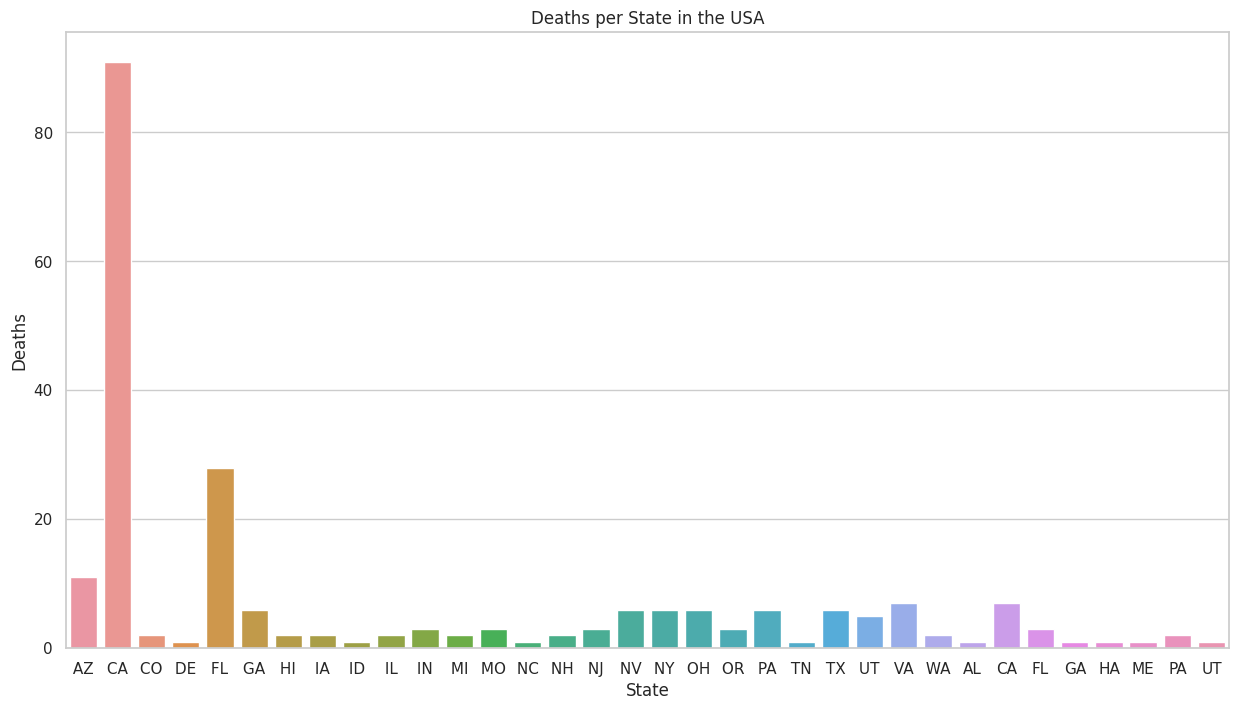

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=usa_state, x='State', y='Deaths').set(title='Deaths per State in the USA')

plt.show()

In [ ]:
# of these deaths how many are tesla drivers,     tesla occupants


# Resultado de Mortes
Falecimento de condutores ou passageiros, em decorrência dos acidentes envolvendo Tesla.


In [24]:
df['Tesla driver'].value_counts()

 -     151
1       99
Name: Tesla driver, dtype: int64

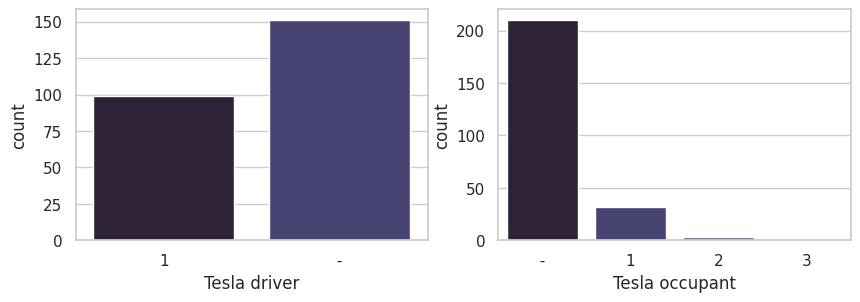

In [25]:
f, axes = plt.subplots(1, 2, figsize=(10,3))
sns.countplot(data=df, x='Tesla driver' , ax=axes[0]);
sns.countplot(data=df, x="Tesla occupant", ax=axes[1]);


In [ ]:
# df.replace(' - ', 0, inplace=True)

In [ ]:
#deaths groupedby country
grouped_country = df.groupby(by=['Country']).sum().reset_index()

# Modelo
Há uma especificação, abaixo, dos veículos envolvidos em acidentes com óbitos da Tesla e, por consequência, sua distribuição por país. Podemos observar uma maior ocorrência envolvendo o Model S, seguido pelo Model 3.

In [37]:
# model of the car

In [36]:
model = df.groupby(by='Model').sum()

<ipython-input-36-6e96e2d87c47>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model = df.groupby(by='Model').sum()


In [38]:
model.reset_index(inplace=True)
model

,Model,Case #,Year,Deaths,Deceased 4
0,-,20826,296937,174,0.0
1,S,3591,90837,54,0.0
2,X,1687,34328,19,0.0
3,Y,1263,14146,9,0.0
4,3,4259,70698,41,0.0


<Axes: xlabel='Model', ylabel='Deaths'>

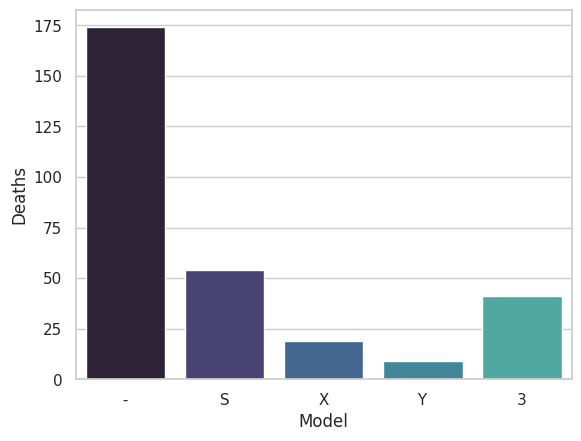

In [39]:
sns.barplot(data=model, x='Model', y='Deaths')

In [40]:
models_country =df.groupby(by=['Country', 'Model']).sum().reset_index()

<ipython-input-40-4f1fbf8146d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  models_country =df.groupby(by=['Country', 'Model']).sum().reset_index()


In [41]:
models_country.head(10)

,Country,Model,Case #,Year,Deaths,Deceased 4
0,Australia,-,36,2017,1,0.0
1,Australia,X,222,2022,1,0.0
2,Austria,3,91,2019,1,0.0
3,Belgium,-,149,2021,1,0.0
4,Belgium,3,133,2020,1,0.0
5,Canada,-,369,6057,3,0.0
6,Canada,S,50,2018,1,0.0
7,Canada,X,61,2019,1,0.0
8,Canada,3,109,2020,3,0.0
9,China,-,1515,18188,9,0.0


In [42]:
models_usa = models_country[models_country['Country']==' USA ']

In [43]:
models_usa

,Country,Model,Case #,Year,Deaths,Deceased 4
38,USA,-,16309,230276,139,0.0
39,USA,S,2557,62575,40,0.0
40,USA,X,748,16152,8,0.0
41,USA,Y,1016,12124,7,0.0
42,USA,3,3089,50499,27,0.0


In [44]:
models_china = models_country[models_country['Country']==' China ']

# Modelos de mortes por EUA, China
Podemos observar que há uma maior ocorrência de mortes envolvendo o Model S da Tesla, nos EUA, que é um dos princupais modelos da montadora, lançado em julho de 2012. Na China, há uma maior equiparidade entre os modelos X e Y.

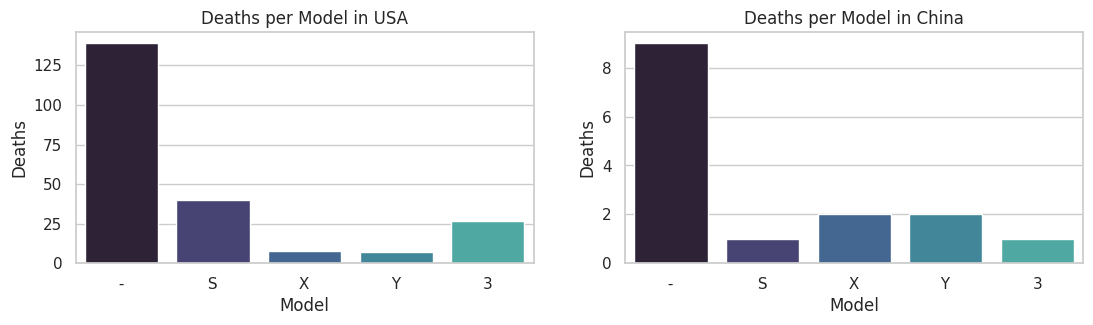

In [45]:
f, axes = plt.subplots(1, 2, figsize=(13,3))

sns.barplot(data=models_usa, x='Model', y='Deaths', ax=axes[0]).set(title='Deaths per Model in USA');
sns.barplot(data=models_china, x='Model', y='Deaths' ,ax=axes[1]).set(title='Deaths per Model in China');

O que podemos observar, com o trabalho, é que há uma maior correlação entre acidentes envolvendo veículos elétricos da Tesla e sua localidade, como por exemplo, o país de origem da Tesla, os Estados Unidos. Isso, naturalmente, decorreria de uma maior proporção de veículos por condutores. Apesar disso, um trabalho subsequente pode tentar averiguar quais seriam as principais soluções da montadora elétrica para lidar com o problema. Uma das questões apontadas é o sistema de direção autônoma da Tesla. Há também, na indústria, uma discussão sobre o sistema de sensores e equipamentos.
